In [34]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from functools import partial
from math import sqrt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from getdist import plots, MCSamples
font = {'size'   : 14, 'family':'Serif'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
year = 365*24*3600
fref = 1/year
logamp = -14.6 #np.log10(6.4e-15) 
logI = 2*logamp - np.log10(2*fref)
gamma = 13/3
nI = 2 - gamma
gwb_args = (logamp,gamma)
def gwb_model(logamp,gamma,f=1/year,fref=1/year):
    logI = 2*logamp - np.log10(2*fref)
    I_f = 10**logI * (f/fref)**(2-gamma)
    return I_f
Tobs = 15*year
df = 1/Tobs
nfreqs = 14
freqs = 1/Tobs + df*np.arange(0,nfreqs)


### Noise vs signal for the series expansion results in section 3.2.2

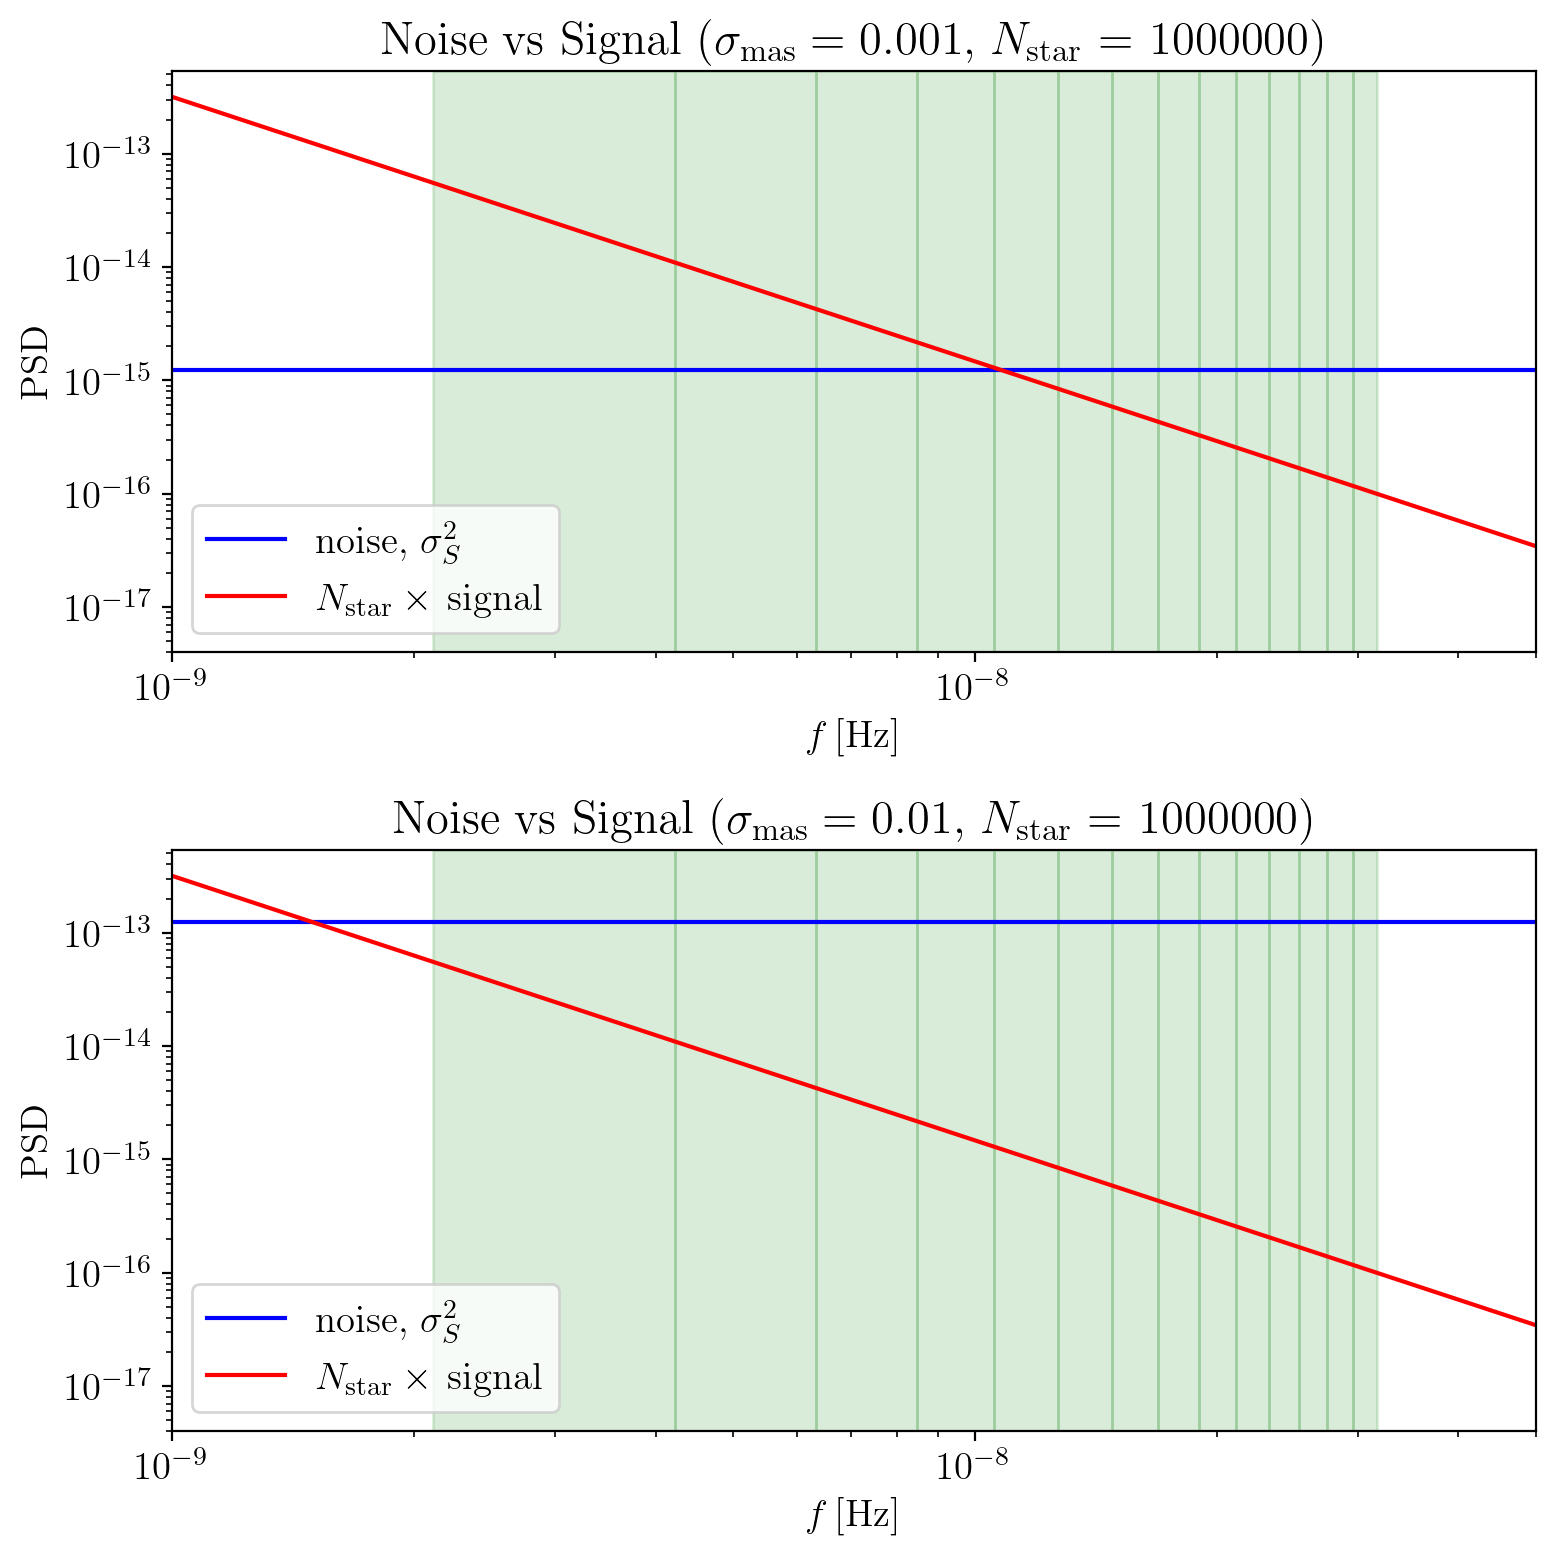

In [35]:
npsr=75
nstar=1000000

sigma_mas = 0.001 #0.001 * np.sqrt((nstar/1000)) # to keep signal vs noise similar
conv_fac = 4.84814e-6 # as to radians
def noise_astro(f,sigma=sigma_mas,dT=year/15.): # every week 52, every 2 weeks 26,...
    sigma = sigma * 1e-3 * conv_fac
    noise = 2 * sigma**2 * dT
    return noise


hfreqs = np.geomspace(1e-9, 1e-7, 100)
fbin_edges = df * np.arange(1, 16)

plt.figure(figsize=(8, 8))

# Subplot 1: sigma_mas = 0.001
plt.subplot(2, 1, 1)
plt.loglog(hfreqs, 4 * np.pi * noise_astro(1, sigma=0.001) * np.ones_like(hfreqs), label=r'noise, $\sigma_S^2$', color='b')
plt.loglog(hfreqs, nstar * gwb_model(*gwb_args, f=hfreqs), label=r'$N_{\rm star} \times\, \rm signal$', color='r')
for i in range(len(fbin_edges) - 1):
    plt.axvspan(fbin_edges[i], fbin_edges[i + 1], alpha=0.15, color=f'g')
plt.legend()
plt.xlim(1e-9, 5e-8)
plt.xlabel(r'$f\,\mathrm{[Hz]}$')
plt.ylabel(r'PSD')
plt.title(fr'Noise vs Signal ($\sigma_{{\rm mas}} = 0.001,\, N_{{\rm star}}$ = {nstar})')

# Subplot 2: sigma_mas = 0.01
plt.subplot(2, 1, 2)
plt.loglog(hfreqs, 4 * np.pi * noise_astro(1, sigma=0.01) * np.ones_like(hfreqs), label=r'noise, $\sigma_S^2$', color='b')
plt.loglog(hfreqs, nstar * gwb_model(*gwb_args, f=hfreqs), label=r'$N_{\rm star} \times\, \rm signal$', color='r')
for i in range(len(fbin_edges) - 1):
    plt.axvspan(fbin_edges[i], fbin_edges[i + 1], alpha=0.15, color=f'g')
plt.legend()
plt.xlim(1e-9, 5e-8)
plt.xlabel(r'$f\,\mathrm{[Hz]}$')
plt.ylabel(r'PSD')
plt.title(fr'Noise vs Signal ($\sigma_{{\rm mas}} = 0.01,\, N_{{\rm star}}$ = {nstar})')

plt.tight_layout()
plt.show()

### Noise vs signal for the full results with lower number of stars in section 3.2.1

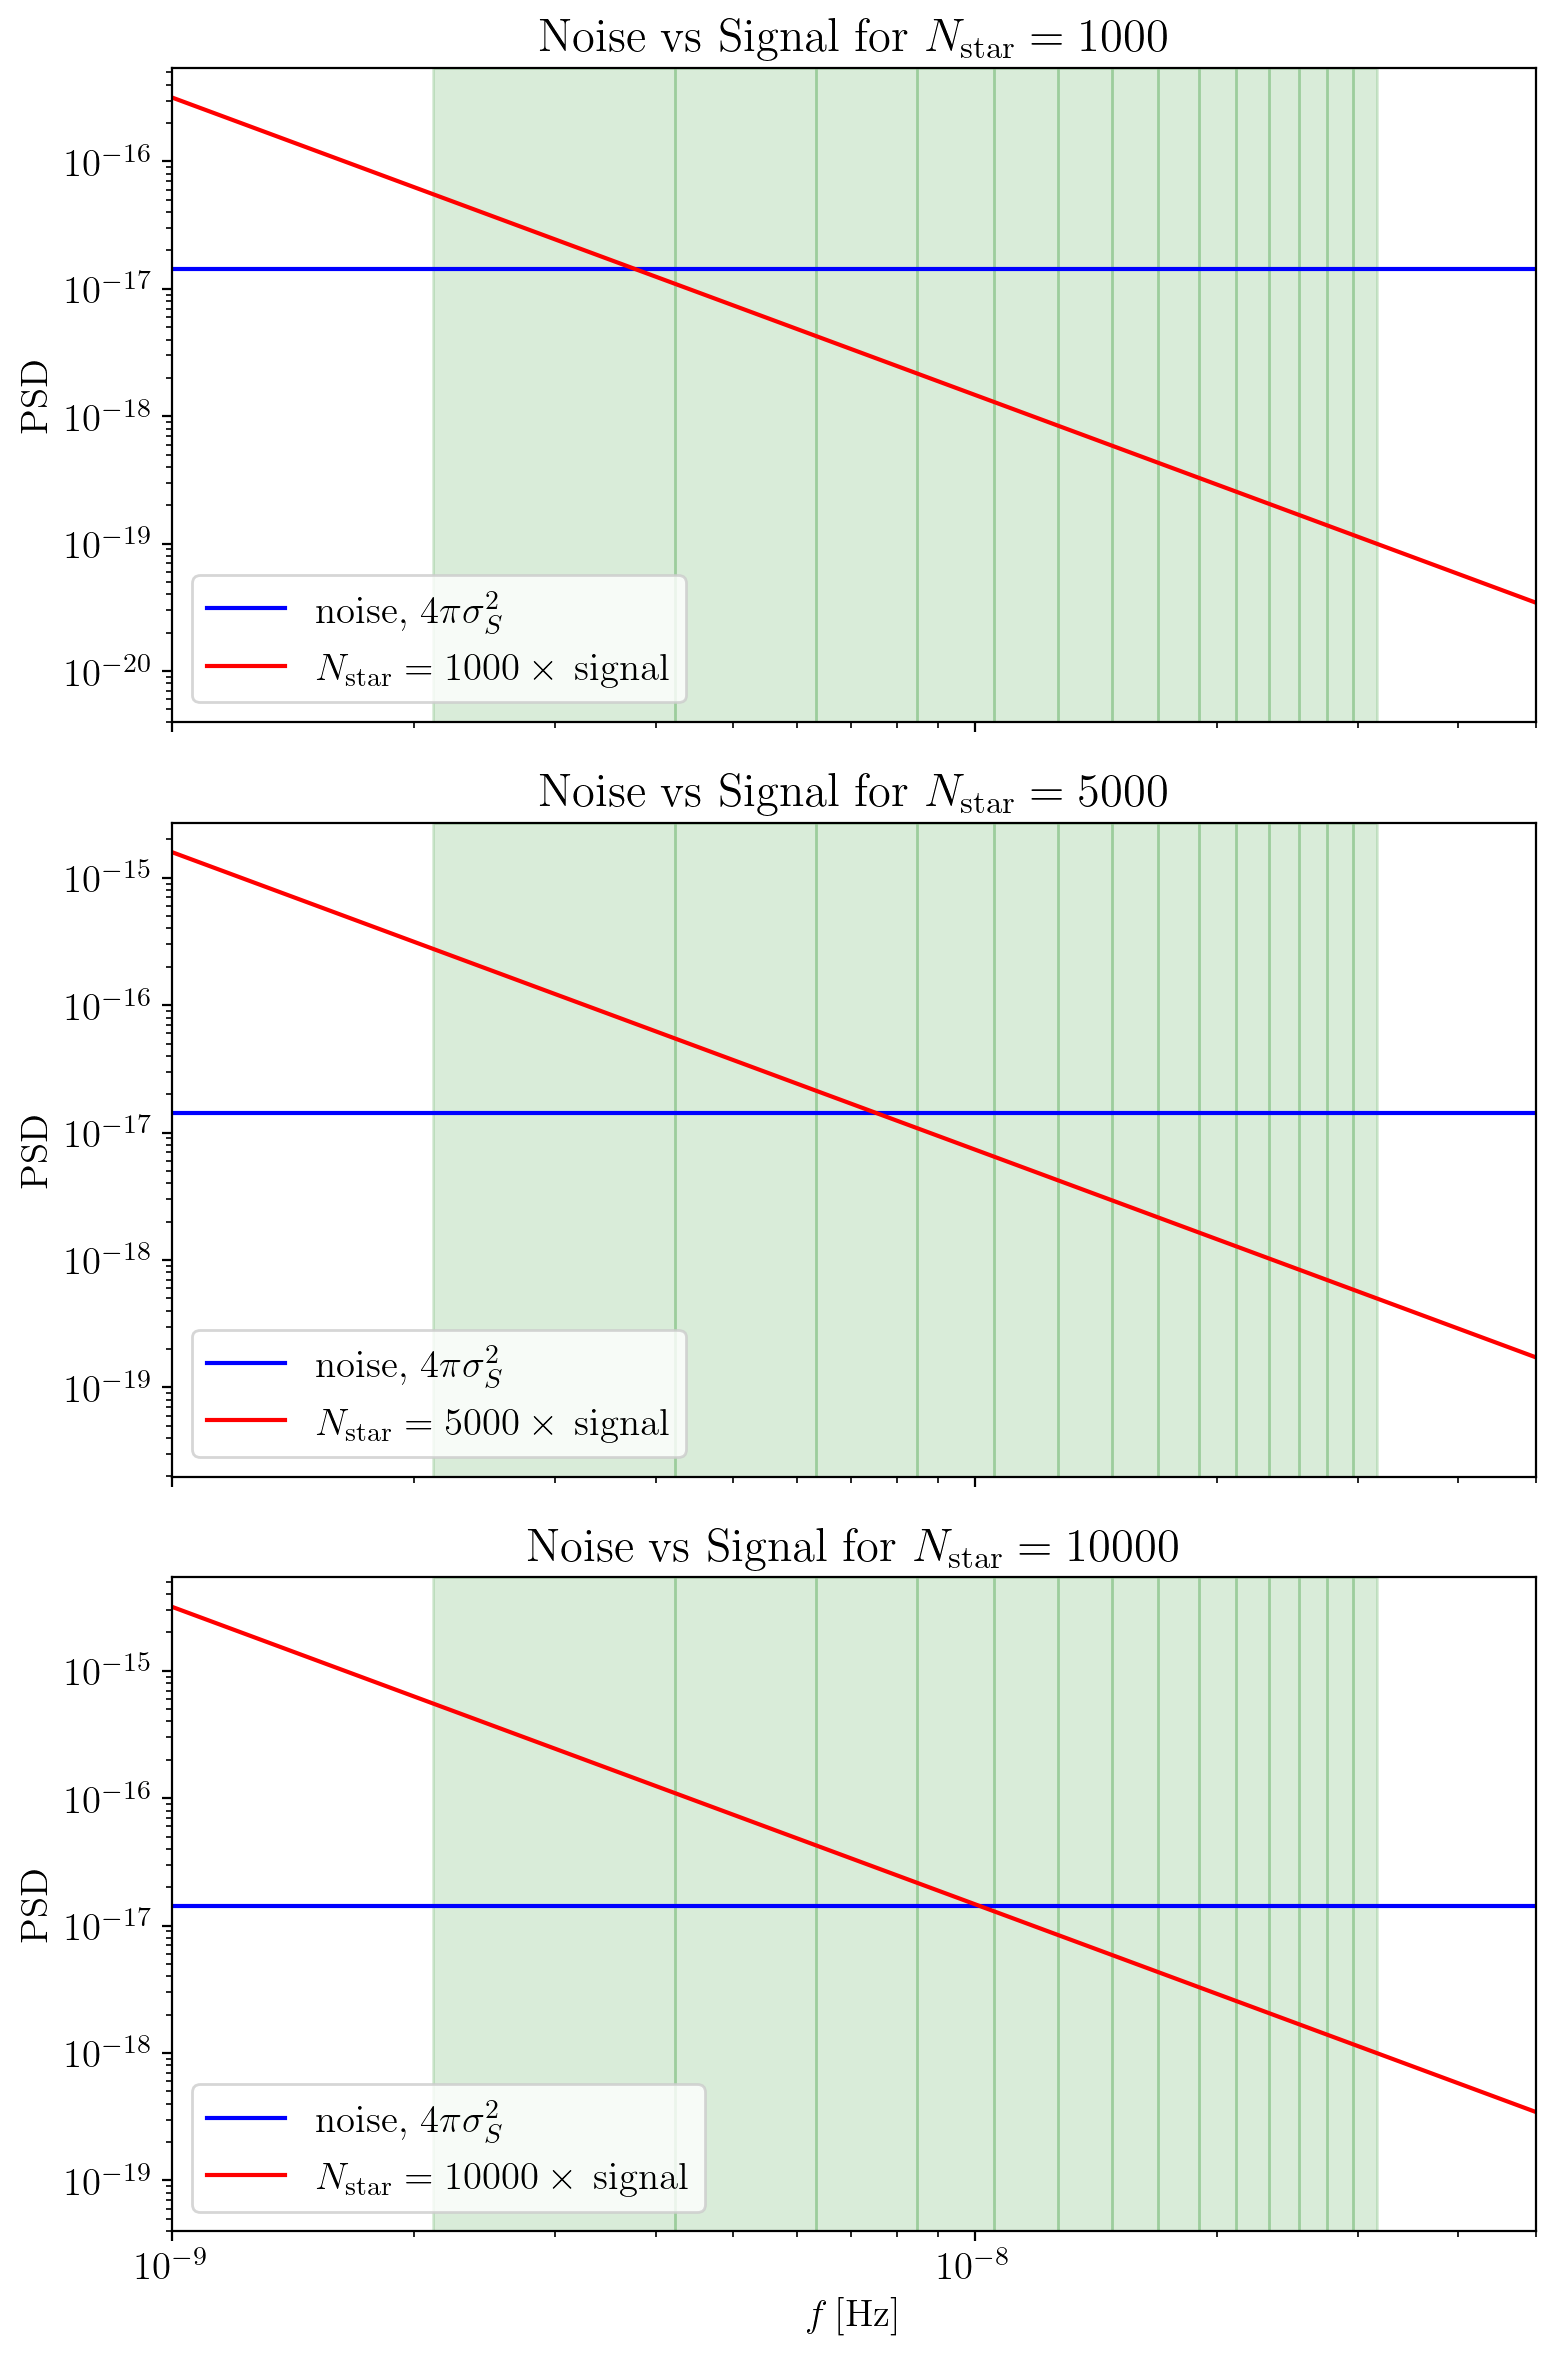

In [58]:
npsr = 75
nstar_values = [1000, 5000, 10000]  # Different nstar values to plot
sigma_mas = 0.0002 # Original sigma_mas
conv_fac = 4.84814e-6  # as to radians

def noise_astro(f, sigma=sigma_mas, dT=year / 52.):  # every week 52, every 2 weeks 26,...
    sigma = sigma * 1e-3 * conv_fac
    noise = 2 * sigma**2 * dT
    return noise

hfreqs = np.geomspace(1e-9, 1e-7, 100)
fbin_edges = df * np.arange(1, 16)

# Create subplots with shared x-axis
fig, axes = plt.subplots(len(nstar_values), 1, figsize=(8, 12), sharex=True)

# Loop through nstar values and create subplots
for i, (nstar, ax) in enumerate(zip(nstar_values, axes)):
    ax.loglog(hfreqs, 4 * np.pi * noise_astro(1) * np.ones_like(hfreqs), label=r'noise, $4\pi \sigma_S^2$', color='b')
    ax.loglog(hfreqs, nstar * gwb_model(*gwb_args, f=hfreqs), label=fr'$N_{{\rm star}} = {nstar} \times\, \rm signal$', color='r')
    for j in range(len(fbin_edges) - 1):
        ax.axvspan(fbin_edges[j], fbin_edges[j + 1], alpha=0.15, color=f'g')
    ax.legend()
    ax.set_xlim(1e-9, 5e-8)
    ax.set_ylabel(r'PSD')
    ax.set_title(fr'Noise vs Signal for $N_{{\rm star}} = {nstar}$')

# Set shared x-axis label
axes[-1].set_xlabel(r'$f\,\mathrm{[Hz]}$')

plt.tight_layout()
plt.show()

### Noise vs signal for the series vs full comparison example

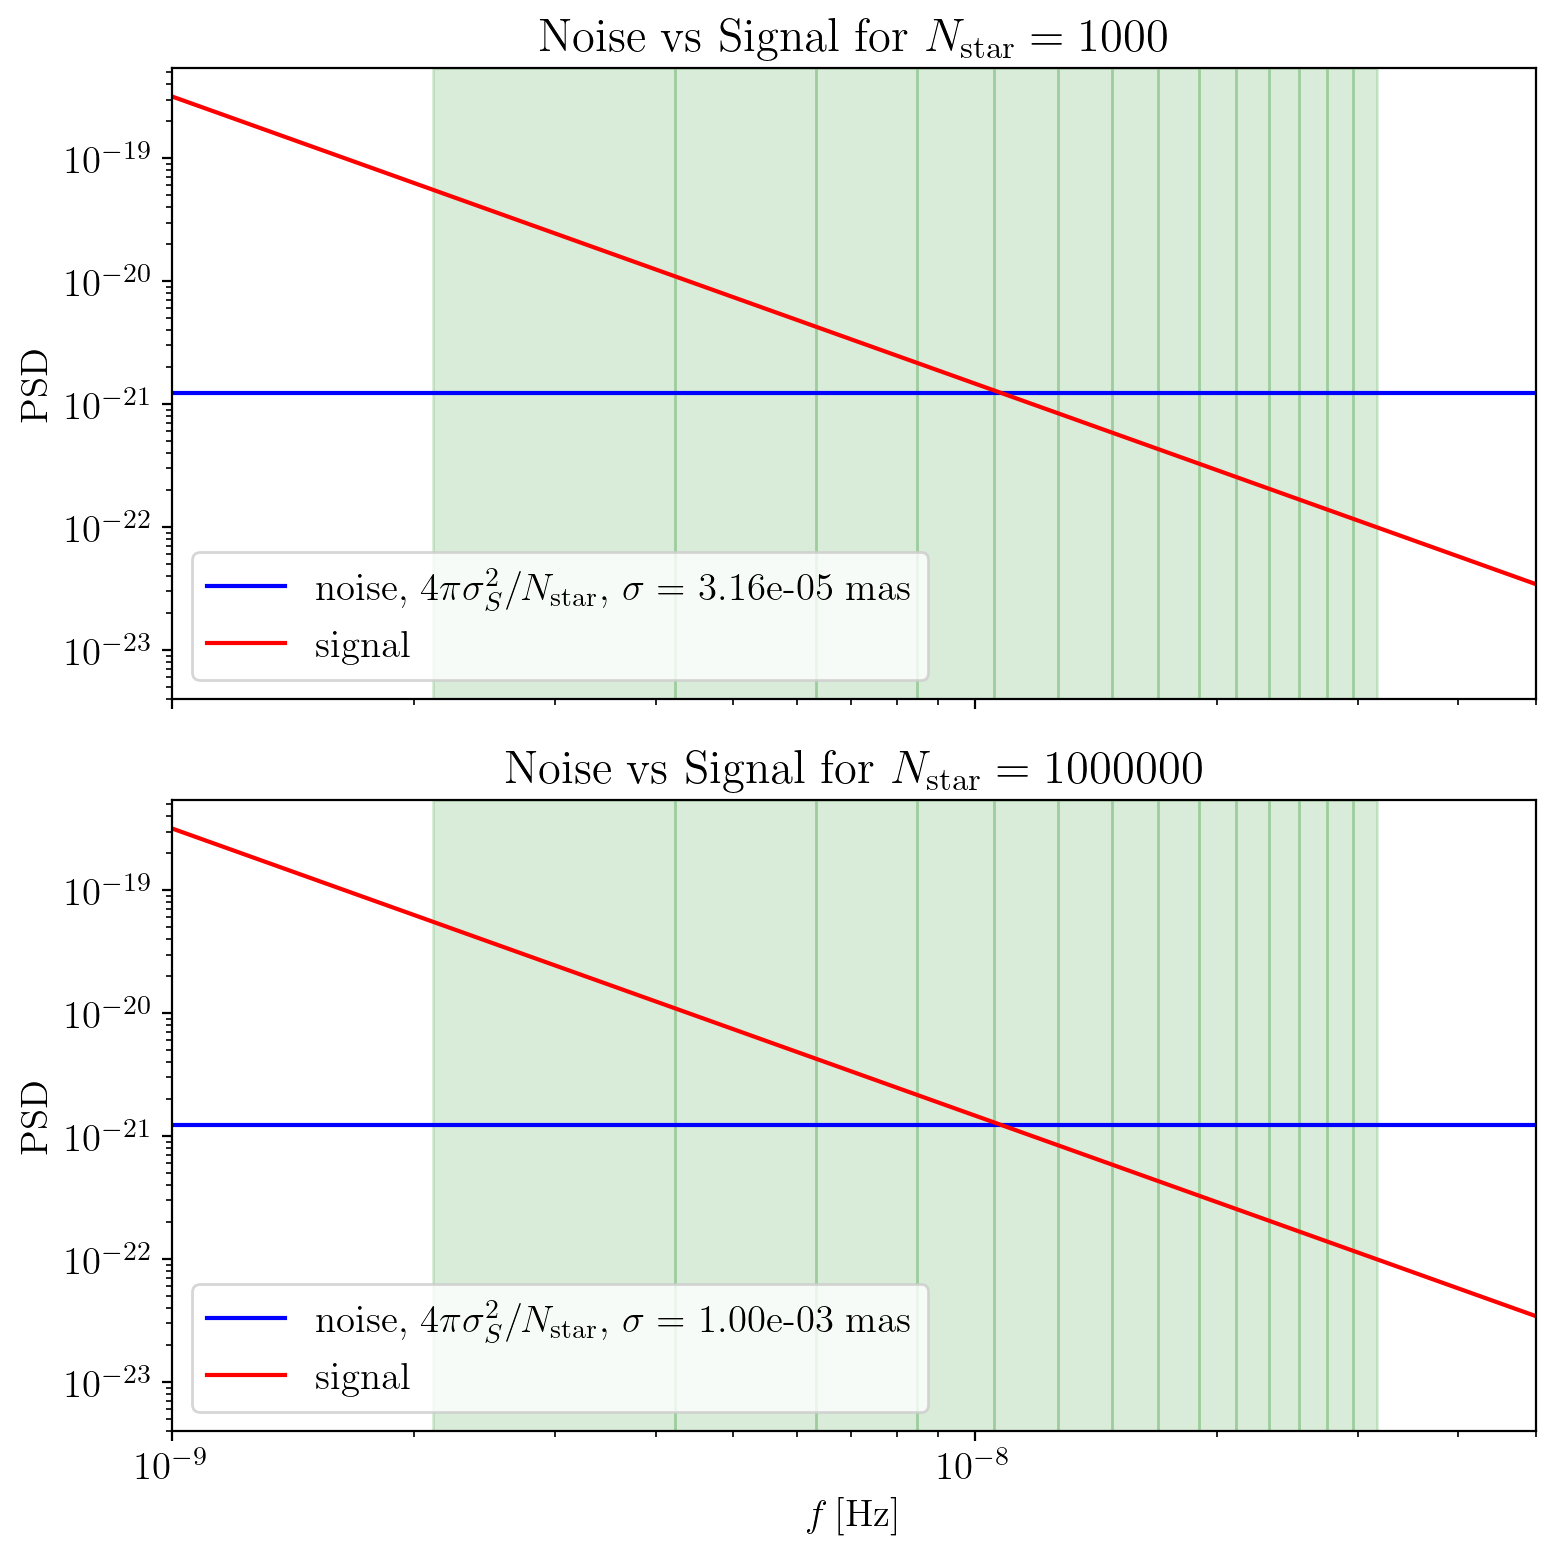

In [59]:
# we construct an example where astrometric noise vs signal ratio for Nstar = 10^6, sigma_mas = 0.001 is imitated using a smaller Nstar
# This is used to compare the series expansion method with the full fisher calculation.
# Since the signal is the same, we plot the quantity noise/Nstar to compare the two cases.

npsr = 75
nstar_values = [1000,1000000]  # Different nstar values to plot
sigma_mas = 0.001
sigma_vals = [0.0001/sqrt(10),0.001]
dTs = [year/15,year/15]  # Different dT values to plot
conv_fac = 4.84814e-6  # as to radians
def noise_astro(f, sigma=sigma_mas, dT=year / 15.):  # every week 52, every 2 weeks 26,...
    sigma = sigma * 1e-3 * conv_fac
    noise = 2 * sigma**2 * dT
    return noise

hfreqs = np.geomspace(1e-9, 1e-7, 100)
fbin_edges = df * np.arange(1, 16)

# Create subplots with shared x-axis
fig, axes = plt.subplots(len(nstar_values), 1, figsize=(8, 4*len(nstar_values)), sharex=True)

# Loop through nstar values and create subplots
for i, (nstar, ax) in enumerate(zip(nstar_values, axes)):
    sigma = sigma_vals[i]
    dT = dTs[i]
    ax.loglog(hfreqs, 4 * np.pi * noise_astro(1,sigma=sigma,dT=dT) * np.ones_like(hfreqs) / nstar
              , label=fr'noise, $4\pi \sigma_S^2 /N_{{\rm star }} $, $\sigma=$ {sigma:.2e} mas', color='b')
    ax.loglog(hfreqs, gwb_model(*gwb_args, f=hfreqs), label=fr'$\rm signal$', color='r')
    for j in range(len(fbin_edges) - 1):
        ax.axvspan(fbin_edges[j], fbin_edges[j + 1], alpha=0.15, color=f'g')
    ax.legend()
    ax.set_xlim(1e-9, 5e-8)
    ax.set_ylabel(r'PSD')
    ax.set_title(fr'Noise vs Signal for $N_{{\rm star}} = {nstar}$')

# Set shared x-axis label
axes[-1].set_xlabel(r'$f\,\mathrm{[Hz]}$')

plt.tight_layout()
plt.show()